### A comparison between 2 XRD profiles and experimental data of NaCl w/ photon wavelength = 1.54056 
1. Our gaussian profile, FWHM = 0.2
2. Experimental data from http://rruff.info/salt/display=default/R070292
3. Mercury gaussian profile, FWHM = 0.2

# TODO: CODE SIMILARITY FUNCTIONS

# 1. our profile

In [1]:
from XRD import Element, crystal, XRD
import numpy as np
import matplotlib.pyplot as plt

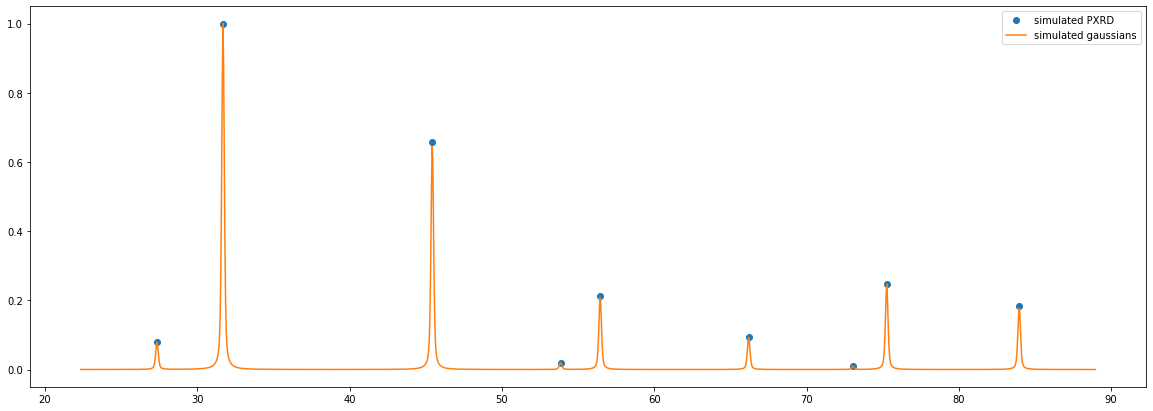

In [2]:
_struct = crystal('cif',filename='NaCl.cif')
_wavelength = 1.54056
_max_diff_angle = 90
_profile = 'psuedo_voigt'
_fwhm = 0.2
_po = True
_G = 1
xrd = XRD(_struct,_wavelength,_max_diff_angle,_profile,_fwhm,_po,_G)
simpeaks = xrd.pxrd[:][:,-1]
simtwo_thetas = xrd.pxrd[:,0]
gpeaks = xrd.gpeaks
gtwo_thetas = xrd.gtwo_thetas
plt.figure(figsize=(20,7))
plt.plot(simtwo_thetas,simpeaks,'o',label = 'simulated PXRD')
plt.plot(gtwo_thetas,gpeaks, label = 'simulated gaussians')
plt.legend()
plt.show()

# 2. mercury profile

In [3]:
merc_data = np.loadtxt(fname="NaCl-mercury.tsv")
merc_data[:][:,1] = merc_data[:][:,1]/np.max(merc_data[:][:,1])

# this came from the raw data generated by mercury from cif file.
merctheta2 = [27.36, 31.7, 45.44, 53.86, 56.46, 
         66.2, 73.04, 75.26, 83.96] 

mercI = [869.034, 10000, 5137.09, 129.666, 1293.58,
          443.317, 40.9454, 921.455, 534.736]

mercI = [i/max(mercI) for i in mercI]

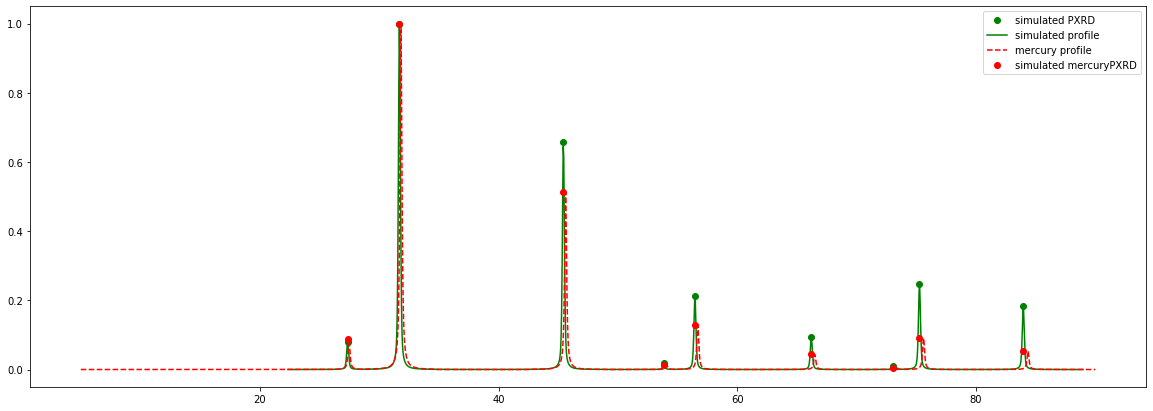

In [4]:
plt.figure(figsize=(20,7))
plt.plot(simtwo_thetas,simpeaks,'go',label = 'simulated PXRD')
plt.plot(gtwo_thetas,gpeaks, 'g-',label = 'simulated profile')

plt.plot(merc_data[:][:,0],merc_data[:][:,1],'r--',ms = 0.9,label = 'mercury profile')
plt.plot(merctheta2,mercI,'ro',label = 'simulated mercuryPXRD')

plt.legend()
plt.show()

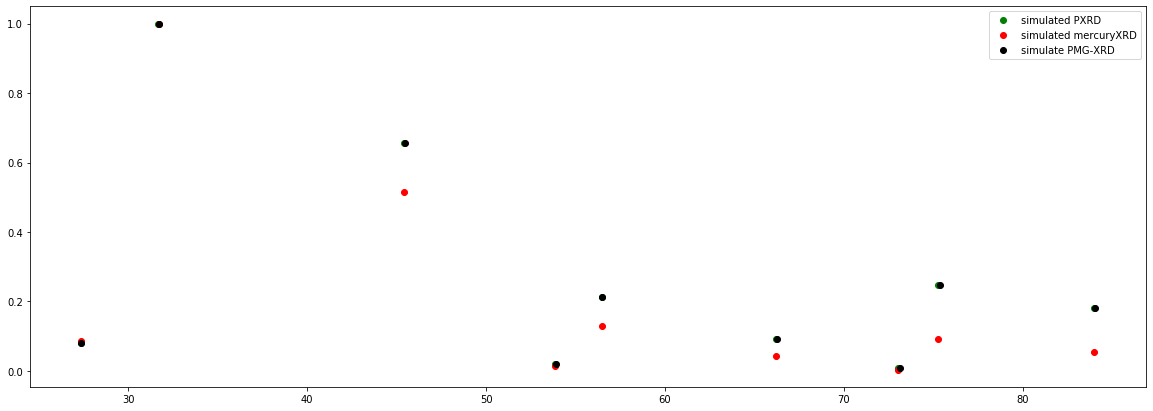

In [5]:
# simulated XRD still very different in intensity values, cross check with pymatgen

import pymatgen as mg
from pymatgen.analysis.diffraction.xrd import XRDCalculator as PMXRD

calc = PMXRD(wavelength=1.54184,)
_struct = mg.Structure.from_file('NaCl.cif')
pattern = calc.get_pattern(_struct)
pmgtwo_theta = pattern.x
pmgpeaks= pattern.y/np.max(pattern.y)

plt.figure(figsize=(20,7))
plt.plot(simtwo_thetas,simpeaks,'go',label = 'simulated PXRD')
plt.plot(merctheta2,mercI,'ro',label = 'simulated mercuryXRD')
plt.plot(pmgtwo_theta,pmgpeaks,'ko',label = 'simulate PMG-XRD')
plt.legend()
plt.show()



# 2. experimental data

In [6]:
exp_data = np.loadtxt(fname="NaCl-experiment.txt",delimiter=",")
exp_data[:][:,1] = exp_data[:][:,1]/np.max(exp_data[:][:,1])



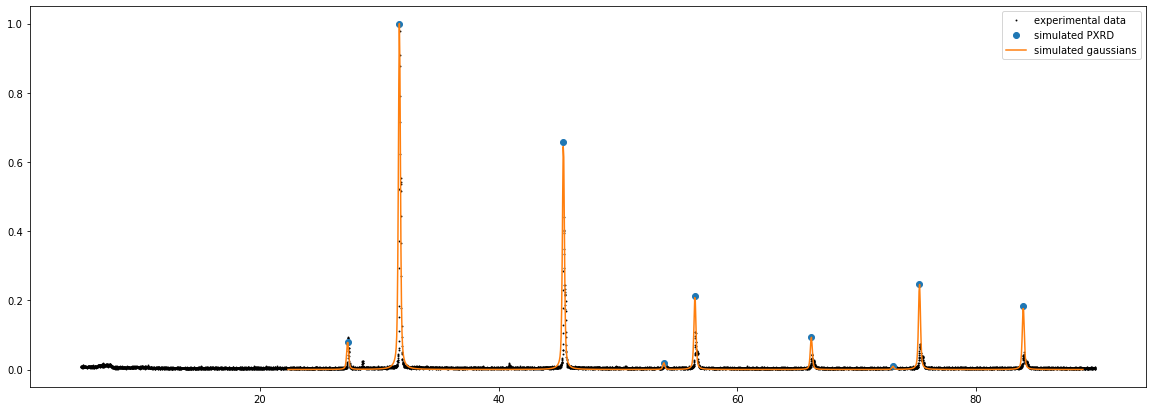

In [7]:
plt.figure(figsize=(20,7))
plt.plot(exp_data[:][:,0],exp_data[:][:,1],'ko',ms = 0.9,label='experimental data')
plt.plot(simtwo_thetas,simpeaks,'o',label = 'simulated PXRD')
plt.plot(gtwo_thetas,gpeaks, label = 'simulated gaussians')


plt.legend()
plt.show()

# all together

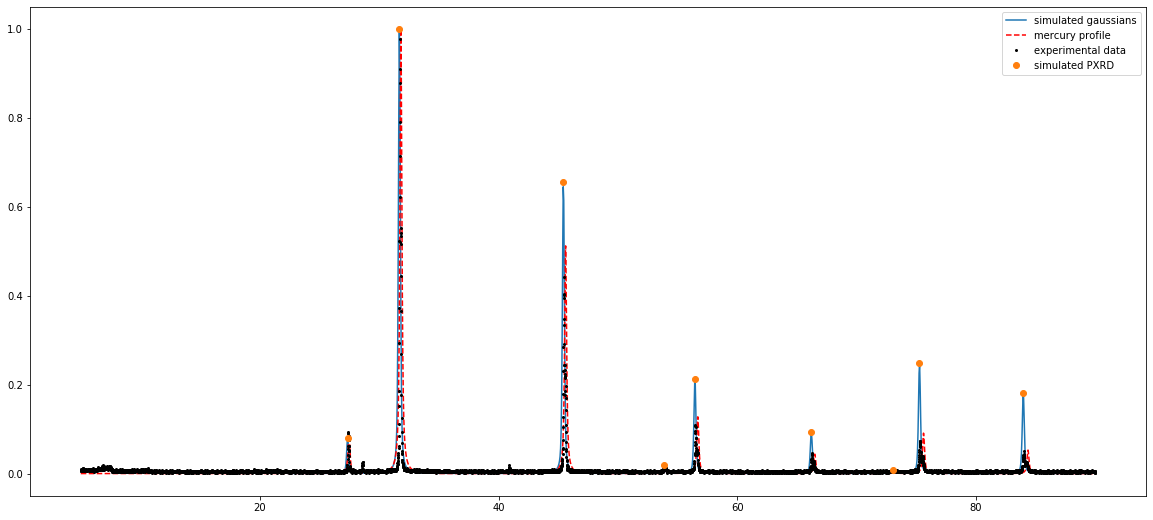

In [8]:
# all together now
plt.figure(figsize=(20,9))
plt.plot(gtwo_thetas,gpeaks, label = 'simulated gaussians')
plt.plot(merc_data[:][:,0],merc_data[:][:,1],'--r',ms = 0.9, label = 'mercury profile')
plt.plot(exp_data[:][:,0],exp_data[:][:,1],'ko',ms = 2, label = 'experimental data')
plt.plot(simtwo_thetas,simpeaks,'o',label = 'simulated PXRD')
plt.legend()
plt.show()